# Final Project

**By Charles Roberts and Hudson Arney**


# Introduction

Our project aims to analyze various economic indicators and their impact on the S&P 500 index. Throughout this project, we compiled and cleaned extensive datasets, including Federal Reserve Rates, Unemployment Rates, GDP, and Minimum Wage Rates. With this now cleaned data, we continued to perform different EDA tests, such as displaying the distributions of each economic indicator. Finally, we looked into the correlation between different economic indicators and the S&P 500 through different tests, such as finding the pearson's correlation coefficient for each indicator. Once that was completed, we also used predictive modeling, such as linear regression, in order to try and formulate clear predictions of our own. 

# Loading & Cleaning Data

In this cells below, all imports are called and both datasets for the the S&P 500 index, Federal Reserve Rates, Unemployment Rates, Minimum Wage Rates, and GDP are loaded into pandas and are printed out using pd.head(). Cleaning had to be slightly individualized for all datasets; however, once cleaned, all datasets should follow a similar format to make for easy merging into one dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
from tabulate import tabulate
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [2]:
file_path = 'sp500_index.csv'
sp = pd.read_csv(file_path)
sp['Date'] = pd.to_datetime(sp['Date'])
sp.head(-10)

,Date,S&P500
0,2013-10-28,1762.11
1,2013-10-29,1771.95
2,2013-10-30,1763.31
3,2013-10-31,1756.54
4,2013-11-01,1761.64
...,...,...
2501,2023-10-05,4258.19
2502,2023-10-06,4308.50
2503,2023-10-09,4335.66
2504,2023-10-10,4358.24


In the cell below, the S&P 500 is graphed on a scatter plot showing off the values of the index from 2013 to 2023 on a day to day basis. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


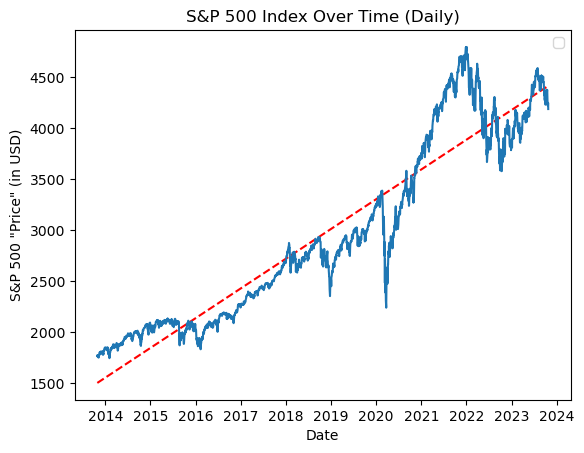

In [3]:
x = mdates.date2num(sp['Date'])
y = sp['S&P500']
trend_line = np.polyfit(x, y, 1)
plt.plot(sp['Date'], np.polyval(trend_line, x), color='red', linestyle='--')
plt.plot(sp['Date'], sp['S&P500'])
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('S&P 500 Index Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('S&P 500 "Price" (in USD)')
plt.legend()
plt.show()

This S&P data is great and very dense, however most datasets don't have daily values. It gives a value for every day from October 28th, 2013 to October 11th, 2023 (this year). To slightly clean this I will add make a new dataframe to calculate the monthly S&P average, and then match that with other important economic indicators with monthly averages. We will primarly be using U.S. Labor Beareau of Statistics to get our data. This data is what we will base all other comparisons on, making **S&P the dependent variable.** 

______________________________________________________________________________________________________________________
In the cell below, the S&P is grouped by a monthly average and displayed. 

In [4]:
sp_monthly_average = pd.DataFrame()
sp.set_index('Date', inplace=True)
# Calculate the monthly average
sp_monthly_average['S&P Monthly Average'] = sp['S&P500'].resample('M').mean()
sp_monthly_average.reset_index(inplace=True)

# Set the date to the first day of the month
sp_monthly_average['Date'] = sp_monthly_average['Date'].dt.to_period('M').dt.to_timestamp()
sp_monthly_average.reset_index(inplace=True)
sp_monthly_average = sp_monthly_average.drop('index', axis=1)
sp_monthly_average.head(-10)

,Date,S&P Monthly Average
0,2013-10-01,1763.477500
1,2013-11-01,1783.541000
2,2013-12-01,1807.775238
3,2014-01-01,1822.356667
4,2014-02-01,1817.034737
...,...,...
106,2022-08-01,4158.563043
107,2022-09-01,3850.520476
108,2022-10-01,3726.050952
109,2022-11-01,3917.488571


In the cell below, the S&P 500 is graphed on a scatter plot showing off the values of the index from 2013 to 2023 on a month to month basis. 

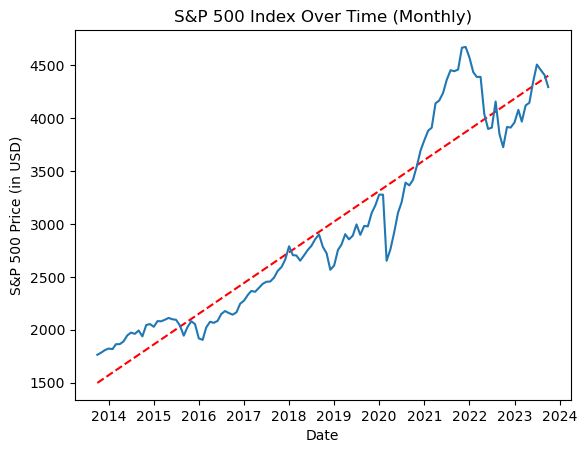

In [5]:
x = mdates.date2num(sp_monthly_average['Date'])
y = sp_monthly_average['S&P Monthly Average']
trend_line = np.polyfit(x, y, 1)
plt.plot(sp_monthly_average['Date'], np.polyval(trend_line, x), color='red', linestyle='--')

plt.plot(sp_monthly_average['Date'], sp_monthly_average['S&P Monthly Average'])
plt.title('S&P 500 Index Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('S&P 500 Price (in USD)')
plt.show()

In [6]:
file_path = 'Effective Federal Funds Rate Daily.csv'
fed_df = pd.read_csv(file_path)
fed_df['Date'] = pd.to_datetime(fed_df['Date'])

#Have to match the S&P dataset
fed_df = fed_df[(fed_df['Date'].dt.year >= 2013) & (fed_df['Date'].dt.year <= 2023)]
fed_df.head(-10)

,Date,Federal Funds Rate
0,2013-10-22,0.08
1,2013-10-28,0.08
2,2013-10-29,0.08
3,2013-10-30,0.08
4,2013-10-31,0.07
...,...,...
3645,2023-11-16,5.33
3646,2023-11-17,5.33
3647,2023-11-18,5.33
3648,2023-11-19,5.33


__________________________________________________________________________________________________________
In the cell below, a scatter plot is displayed for the federal funds rate from 2013 to 2023.

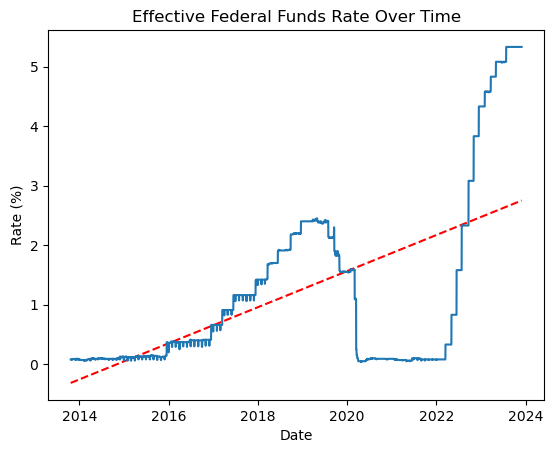

In [7]:
x = mdates.date2num(fed_df['Date'])
y = fed_df['Federal Funds Rate']
trend_line = np.polyfit(x, y, 1)
plt.plot(fed_df['Date'], np.polyval(trend_line, x), color='red', linestyle='--')

plt.plot(fed_df['Date'], fed_df['Federal Funds Rate'])
plt.title('Effective Federal Funds Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.show()

In the cell below, the unemployment rate is displayed for different ethnic groups. 

In [8]:
file_path = 'Unemployment Rate monthly.xlsx'
unemploy_df = pd.read_excel(file_path)
unemploy_df['Date'] = pd.to_datetime(unemploy_df['Month'])
unemploy_df = unemploy_df.drop('Month', axis=1)
unemploy_df = unemploy_df[(unemploy_df['Date'].dt.year >= 2013) & (unemploy_df['Date'].dt.year <= 2023)]
unemploy_df = unemploy_df[['Date'] + [col for col in unemploy_df.columns if col != 'Date']]
unemploy_df.head(-10)

,Date,Unemployment Rate,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino
111,2013-01-01,8.0,7.5,7.2,23.7,7.1,13.7,6.4,9.7
112,2013-02-01,7.7,7.0,7.0,25.2,6.8,13.8,6.0,9.7
113,2013-03-01,7.5,6.9,6.9,24.0,6.7,13.0,5.1,9.3
114,2013-04-01,7.6,7.2,6.7,24.4,6.7,13.3,5.3,9.0
115,2013-05-01,7.5,7.1,6.5,24.4,6.7,13.4,4.5,9.0
...,...,...,...,...,...,...,...,...,...
226,2022-08-01,3.7,3.5,3.3,10.4,3.2,6.4,2.8,4.5
227,2022-09-01,3.5,3.3,3.1,11.3,3.1,5.9,2.5,3.9
228,2022-10-01,3.7,3.3,3.4,11.0,3.3,5.9,2.9,4.2
229,2022-11-01,3.6,3.3,3.3,11.3,3.3,5.7,2.6,4.0


The cell above shows a snapshot of unemployment rates over time, segmented by gender, age, and ethnicity. From January 2013 to December 2022, there's a notable overall decrease in the unemployment rate, dropping from 8.0% to 3.5%. This trend is mirrored across the categories, with both men and women over 20 years old experiencing similar declines. Teenagers (16 to 19 years old) have a significantly higher rate, which also decreases over time. Racially, Black or African American individuals start with the highest rates but see substantial improvement, although they remain higher than other groups. Asian individuals have the lowest unemployment rates throughout the period. Hispanic or Latino rates align closely with the general trend, starting higher than the average but decreasing over time. 

Although these are certainly interesting insights to gain, we will only be focusing on the total Unemployment Rate. This most applies as a whole to our project being about large economic factors.

In [9]:
unemploy_df = unemploy_df[['Date', 'Unemployment Rate']]
unemploy_df.head(-10)

,Date,Unemployment Rate
111,2013-01-01,8.0
112,2013-02-01,7.7
113,2013-03-01,7.5
114,2013-04-01,7.6
115,2013-05-01,7.5
...,...,...
226,2022-08-01,3.7
227,2022-09-01,3.5
228,2022-10-01,3.7
229,2022-11-01,3.6


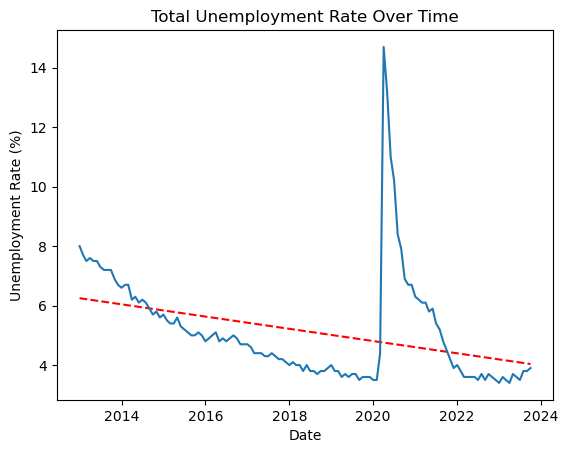

In [10]:
x = mdates.date2num(unemploy_df['Date'])
y = unemploy_df['Unemployment Rate']
trend_line = np.polyfit(x, y, 1)
plt.plot(unemploy_df['Date'], np.polyval(trend_line, x), color='red', linestyle='--')

plt.plot(unemploy_df['Date'], unemploy_df['Unemployment Rate'])
plt.title('Total Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [11]:
file_path = 'GEPU.xlsx'
gdp_df = pd.read_excel(file_path)
gdp_df['Date'] = pd.to_datetime(gdp_df['Date'])

# Have to match the S&P dataset
gdp_df = gdp_df[(gdp_df['Date'].dt.year >= 2013) & (gdp_df['Date'].dt.year <= 2023)]
gdp_df.head(-10)

,Date,GEPU
192,2013-01-01,167.830950
193,2013-02-01,125.631886
194,2013-03-01,141.648638
195,2013-04-01,134.511201
196,2013-05-01,106.414369
...,...,...
306,2022-07-01,313.527890
307,2022-08-01,254.872665
308,2022-09-01,279.791662
309,2022-10-01,298.542244


In the cell below, the GEPU is displayed in a scatter plot from 2013 to 2023. 

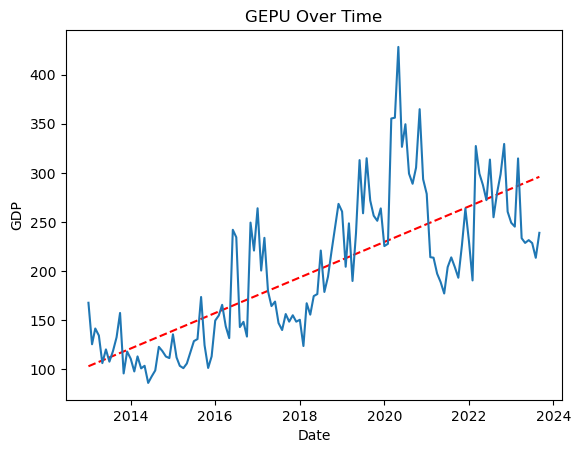

In [12]:
x = mdates.date2num(gdp_df['Date'])
y = gdp_df['GEPU']
trend_line = np.polyfit(x, y, 1)
plt.plot(gdp_df['Date'], np.polyval(trend_line, x), color='red', linestyle='--')

plt.plot(gdp_df['Date'], gdp_df['GEPU'])
plt.title('GEPU Over Time')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.show()

In [13]:
file_path = 'Inflation Rate Monthly.xlsx'
inflation_df = pd.read_excel(file_path)
inflation_df = inflation_df.drop([1, 2]) # Empty Rows, shouldn't be there
inflation_df = pd.melt(inflation_df, id_vars=['Year'], var_name='Month', value_name='Inflation Rate')

inflation_df['Date'] = pd.to_datetime(inflation_df['Year'].astype(int).astype(str) + '-' + inflation_df['Month'], errors='coerce')

inflation_df = inflation_df[['Date', 'Inflation Rate']]
inflation_df = inflation_df.sort_values(by='Date')
inflation_df = inflation_df[(inflation_df['Date'].dt.year >= 2013) & (inflation_df['Date'].dt.year <= 2023)]
inflation_df.reset_index(drop=True, inplace=True)
inflation_df.head(-10)

,Date,Inflation Rate
0,2013-01-01,1.6
1,2013-02-01,2.0
2,2013-03-01,1.5
3,2013-04-01,1.1
4,2013-05-01,1.4
...,...,...
117,2022-10-01,7.7
118,2022-11-01,7.1
119,2022-12-01,6.5
120,2023-01-01,6.4


In the cell below, the inflation rate over time is displayed in a scatter plot from 2013 to 2023. 

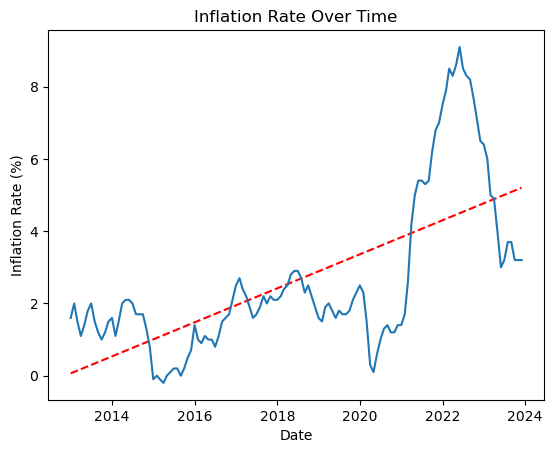

In [14]:
inflation_df['Inflation Rate'] = inflation_df['Inflation Rate'].fillna(method='ffill')
x = mdates.date2num(inflation_df['Date'])
y = inflation_df['Inflation Rate']
trend_line = np.polyfit(x, y, 1)
plt.plot(inflation_df['Date'], np.polyval(trend_line, x), color='red', linestyle='--')

plt.plot(inflation_df['Date'], inflation_df['Inflation Rate'])
plt.title('Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.show()

In [15]:
minimum_wage_file_path = 'Real Minimum Wage.xlsx'
mw_df = pd.read_excel(minimum_wage_file_path)

In [16]:
mw_df['Year'] = pd.to_datetime(mw_df['Date'], format='%Y').dt.year
mw_df['Date'] = pd.to_datetime(mw_df['Year'].astype(str) + '-01-01')
mw_df = mw_df.drop('Year', axis=1)
mw_df.head(11)

,Date,Real Minimum Wage,Federal Minimum Wage
0,2013-01-01,9.107893,7.25
1,2014-01-01,8.962501,7.25
2,2015-01-01,8.951882,7.25
3,2016-01-01,8.840353,7.25
4,2017-01-01,8.655972,7.25
5,2018-01-01,8.449583,7.25
6,2019-01-01,8.299185,7.25
7,2020-01-01,8.198055,7.25
8,2021-01-01,7.830203,7.25
9,2022-01-01,7.612458,7.25


In the cell below, the minimum wage adjusted for inflation is graphed in a scatter plot from 2013 to 2023

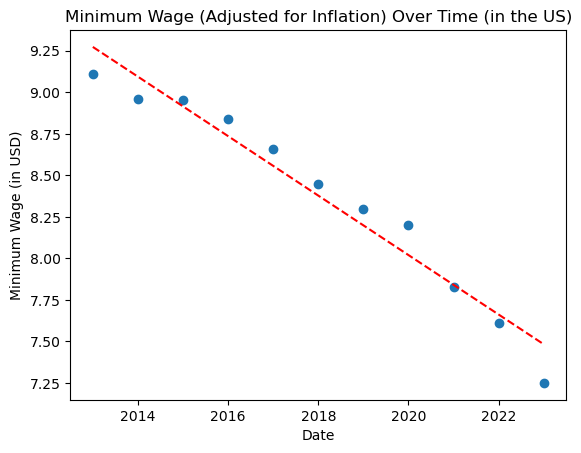

In [17]:
x = mdates.date2num(mw_df['Date'])
y = mw_df['Real Minimum Wage']
trend_line = np.polyfit(x, y, 1)
plt.plot(mw_df['Date'], np.polyval(trend_line, x), color='red', linestyle='--')

plt.scatter(mw_df['Date'], mw_df['Real Minimum Wage'])
plt.title('Minimum Wage (Adjusted for Inflation) Over Time (in the US)')
plt.xlabel('Date')
plt.ylabel('Minimum Wage (in USD)')
plt.show()

# Merging Data

In the cell below, the code will handle missing values, convert date formats, and merge the S&P 500 and Federal Reserve datasets based on dates.

In [18]:
date_range = pd.date_range(start='2013-10-28', end='2023-10-11', freq='D')

date_range_df = pd.DataFrame({'Date': date_range})

merged_data = pd.merge(date_range_df, mw_df, on='Date', how='left')
merged_data = pd.merge(merged_data, gdp_df, on='Date', how='left')
merged_data = pd.merge(merged_data, fed_df, on='Date', how='left')
merged_data = pd.merge(merged_data, inflation_df, on='Date', how='left')
merged_data = pd.merge(merged_data, unemploy_df, on='Date', how='left')
merged_data = pd.merge(merged_data, sp, on='Date', how='left')

merged_data = merged_data.sort_values(by='Date')
merged_data['Delta Time'] = merged_data['Date'] - merged_data['Date'].iloc[0]

In the cell below, the merged data set it printed out for the first few rows. As you can notice, the data has not yet been cleaned.

In [19]:
merged_data.head(-10)

,Date,Real Minimum Wage,Federal Minimum Wage,GEPU,Federal Funds Rate,Inflation Rate,Unemployment Rate,S&P500,Delta Time
0,2013-10-28,NaN,NaN,NaN,0.08,NaN,NaN,1762.11,0 days
1,2013-10-29,NaN,NaN,NaN,0.08,NaN,NaN,1771.95,1 days
2,2013-10-30,NaN,NaN,NaN,0.08,NaN,NaN,1763.31,2 days
3,2013-10-31,NaN,NaN,NaN,0.07,NaN,NaN,1756.54,3 days
4,2013-11-01,NaN,NaN,95.950054,0.08,1.2,6.9,1761.64,4 days
...,...,...,...,...,...,...,...,...,...
3621,2023-09-27,NaN,NaN,NaN,5.33,NaN,NaN,4274.51,3621 days
3622,2023-09-28,NaN,NaN,NaN,5.33,NaN,NaN,4299.70,3622 days
3623,2023-09-29,NaN,NaN,NaN,5.33,NaN,NaN,4288.05,3623 days
3624,2023-09-30,NaN,NaN,NaN,5.33,NaN,NaN,NaN,3624 days


# Data Cleaning by adding correct values to Rows
All of these points columns have NaN values that deserve to be filled with a real value. Many of them don't have anything because of the datetime object only working working for specific days, here we have to make sure data that goes by monthly and yearly gets filled.
### Minimum Rate Column

In [20]:
mw_df['Year'] = mw_df['Date'].dt.year

merged_data['Real Minimum Wage'] = merged_data['Date'].dt.year.map(mw_df.set_index('Year')['Real Minimum Wage'])
merged_data['Federal Minimum Wage'] = merged_data['Date'].dt.year.map(mw_df.set_index('Year')['Federal Minimum Wage'])

merged_data['Real Minimum Wage'] = merged_data['Real Minimum Wage'].fillna(method='ffill')
merged_data['Federal Minimum Wage'] = merged_data['Federal Minimum Wage'].fillna(method='ffill')

### GDP Column

In [21]:
gdp_df['Year_Month'] = gdp_df['Date'].dt.to_period('M')
merged_data['Year_Month'] = merged_data['Date'].dt.to_period('M')

merged_data['GEPU'] = merged_data['Year_Month'].map(gdp_df.set_index('Year_Month')['GEPU'])
merged_data['GEPU'] = merged_data['GEPU'].fillna(method='ffill')

### Inflation Rate Column

In [22]:
inflation_df['Year_Month'] = inflation_df['Date'].dt.to_period('M')
merged_data['Year_Month'] = merged_data['Date'].dt.to_period('M')

merged_data['Inflation Rate'] = merged_data['Year_Month'].map(inflation_df.set_index('Year_Month')['Inflation Rate'])
merged_data['Inflation Rate'] = merged_data['Inflation Rate'].fillna(method='ffill')

### Unemployment Rate Column

In [23]:
unemploy_df['Year_Month'] = unemploy_df['Date'].dt.to_period('M')

merged_data['Unemployment Rate'] = merged_data['Year_Month'].map(unemploy_df.set_index('Year_Month')['Unemployment Rate'])
merged_data['Unemployment Rate'] = merged_data['Unemployment Rate'].fillna(method='ffill')
merged_data.drop('Year_Month', axis=1, inplace=True)

### Federal Interest Rates Column

In [24]:
fed_df['Date'] = pd.to_datetime(fed_df['Date'])
fed_df.set_index('Date', inplace=True)
merged_data['Federal Funds Rate'] = merged_data['Date'].map(fed_df['Federal Funds Rate'])
merged_data['Federal Funds Rate'] = merged_data['Federal Funds Rate'].fillna(method='ffill')
fed_df.reset_index(inplace=True)

### S&P Column

In [25]:
merged_data['S&P500'] = merged_data['Date'].map(sp['S&P500'])
merged_data['S&P500'] = merged_data['S&P500'].fillna(method='ffill')
sp.reset_index(inplace=True)

In [26]:
merged_data.head(-10)

,Date,Real Minimum Wage,Federal Minimum Wage,GEPU,Federal Funds Rate,Inflation Rate,Unemployment Rate,S&P500,Delta Time
0,2013-10-28,9.107893,7.25,157.467147,0.08,1.0,7.2,1762.11,0 days
1,2013-10-29,9.107893,7.25,157.467147,0.08,1.0,7.2,1771.95,1 days
2,2013-10-30,9.107893,7.25,157.467147,0.08,1.0,7.2,1763.31,2 days
3,2013-10-31,9.107893,7.25,157.467147,0.07,1.0,7.2,1756.54,3 days
4,2013-11-01,9.107893,7.25,95.950054,0.08,1.2,6.9,1761.64,4 days
...,...,...,...,...,...,...,...,...,...
3621,2023-09-27,7.250000,7.25,238.990396,5.33,3.7,3.8,4274.51,3621 days
3622,2023-09-28,7.250000,7.25,238.990396,5.33,3.7,3.8,4299.70,3622 days
3623,2023-09-29,7.250000,7.25,238.990396,5.33,3.7,3.8,4288.05,3623 days
3624,2023-09-30,7.250000,7.25,238.990396,5.33,3.7,3.8,4288.05,3624 days


# Exploratory Data Analysis
In the cell below, we are creating a mapping of longer, descriptive column names to shorter acronyms. After renaming, we generate and print a statistical summary, which includes measures like mean, standard deviation, and percentiles for the selected columns, formatted as a readable table.

In [27]:
column_acronyms = {
    'Real Minimum Wage': 'Adj MinWg',
    'Federal Minimum Wage': 'UnAdj MinWg',
    'GEPU': 'GDP',
    'Federal Funds Rate': 'Fed.Intrst.Rte',
    'Inflation Rate': 'Infltn.Rte',
    'Unemployment Rate': 'Unemply.Rte',
}


decimals = 10
merged_data_acronyms = merged_data.rename(columns=column_acronyms)
selected_columns = list(column_acronyms.values())
rounded_data = merged_data_acronyms[selected_columns]
summary_stats = rounded_data.describe()
summary_stats = summary_stats.round(decimals)
print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))

+-------+--------------+-------------+----------------+----------------+--------------+--------------+
|       |  Adj MinWg   | UnAdj MinWg |      GDP       | Fed.Intrst.Rte |  Infltn.Rte  | Unemply.Rte  |
+-------+--------------+-------------+----------------+----------------+--------------+--------------+
| count |    3636.0    |   3636.0    |     3636.0     |     3636.0     |    3636.0    |    3636.0    |
| mean  | 8.342992704  |    7.25     | 205.5790066407 |  1.1658608361  | 2.7128987899 | 4.9574257426 |
|  std  | 0.5456616726 |     0.0     | 74.4718775038  |  1.4286849318  | 2.3224213664 | 1.7750455371 |
|  min  |     7.25     |    7.25     | 86.2835088783  |      0.04      |     -0.2     |     3.4      |
|  25%  | 7.830202987  |    7.25     | 143.1115622417 |      0.09      |     1.3      |     3.8      |
|  50%  | 8.4495834608 |    7.25     | 204.1056973898 |      0.4       |     2.0      |     4.4      |
|  75%  | 8.8403532915 |    7.25     | 258.8835963638 |      1.9       | 

In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3636 entries, 0 to 3635
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Date                  3636 non-null   datetime64[ns] 
 1   Real Minimum Wage     3636 non-null   float64        
 2   Federal Minimum Wage  3636 non-null   float64        
 3   GEPU                  3636 non-null   float64        
 4   Federal Funds Rate    3636 non-null   float64        
 5   Inflation Rate        3636 non-null   float64        
 6   Unemployment Rate     3636 non-null   float64        
 7   S&P500                3636 non-null   float64        
 8   Delta Time            3636 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(7), timedelta64[ns](1)
memory usage: 284.1 KB


All of the comparisons we will be making are numerical vs. numerical. Linear Regression will be the best choice of model for this reason to see if we can predict price.

In [29]:
numerical_columns = merged_data.columns[1:-2]    

In this cell below we created some histograms with Kernel Density Estimate (KDE) overlays for each column. This is done to visualize the distribution of values within each column and identify outliers.

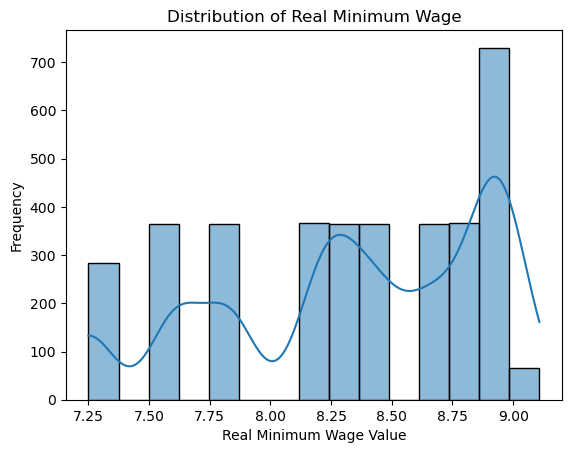

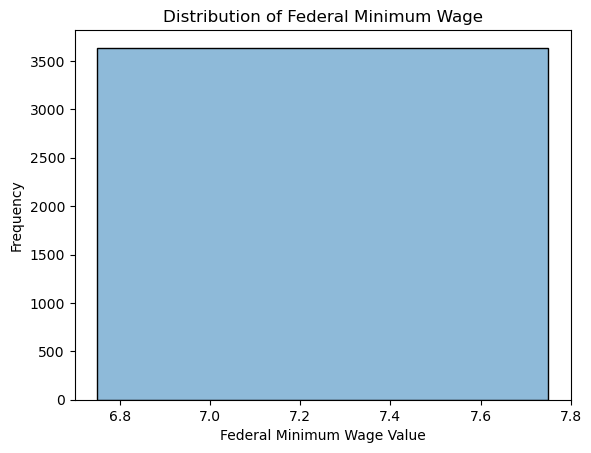

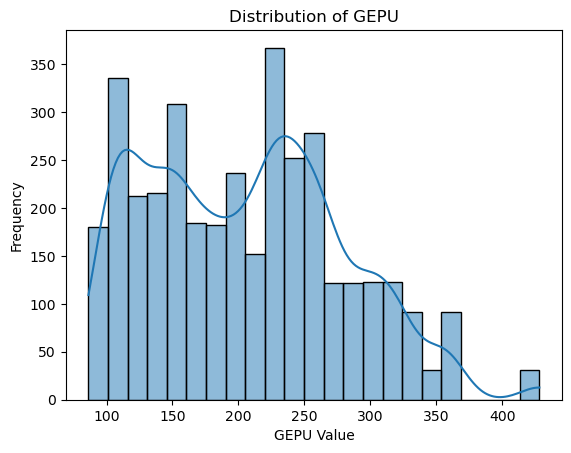

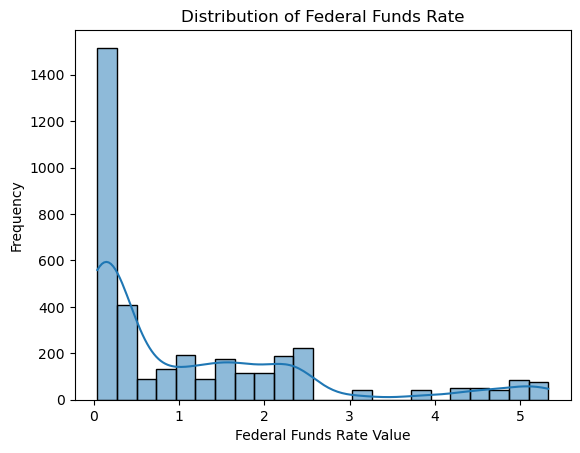

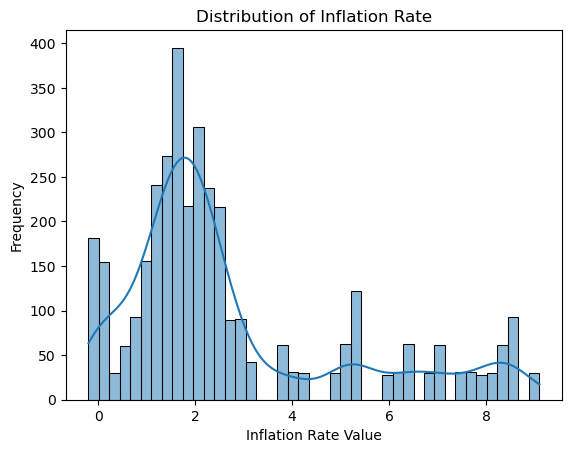

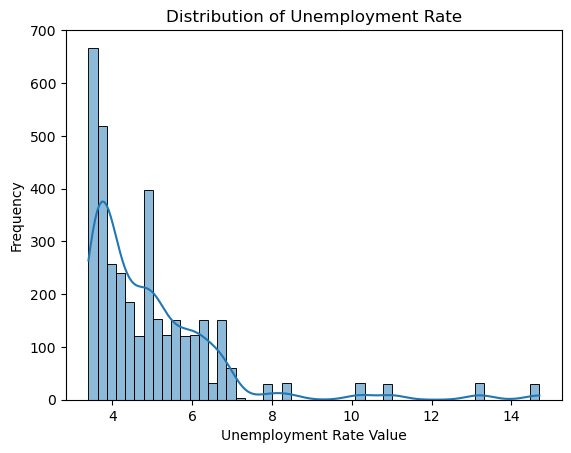

In [30]:
for column in numerical_columns:
    sns.histplot(merged_data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column} Value')
    plt.ylabel('Frequency')
    plt.show()

From these graphs we can see how Unemployment, Inflation, and Federal Funds have a distribution on the lower end. This makes sense as a functioning economy want all these values to be closer to zero. The montly GDP was probably the most "Normal" looking distribution of these.

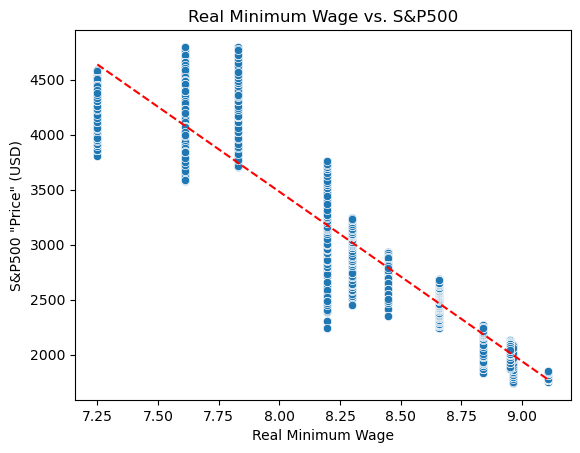

C:\Users\arneyh\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


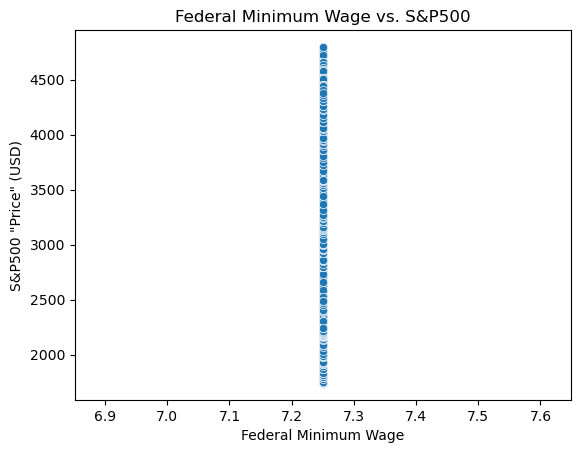

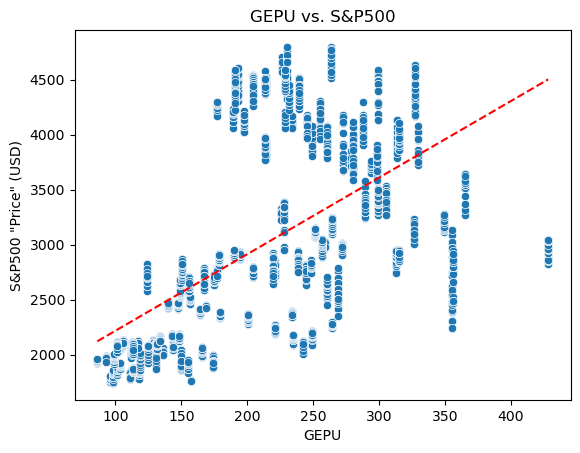

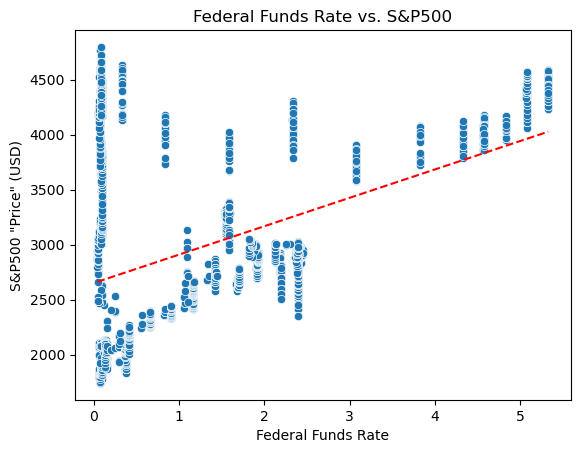

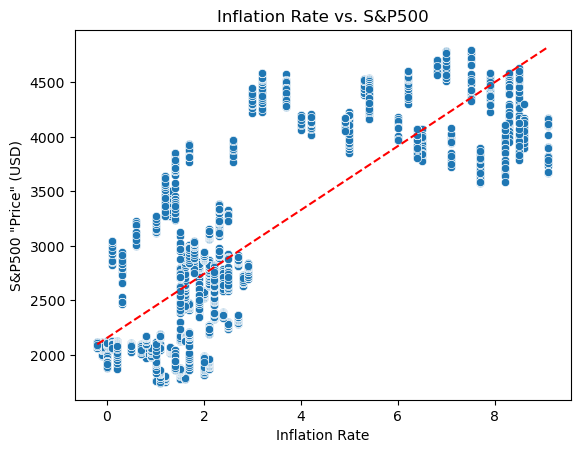

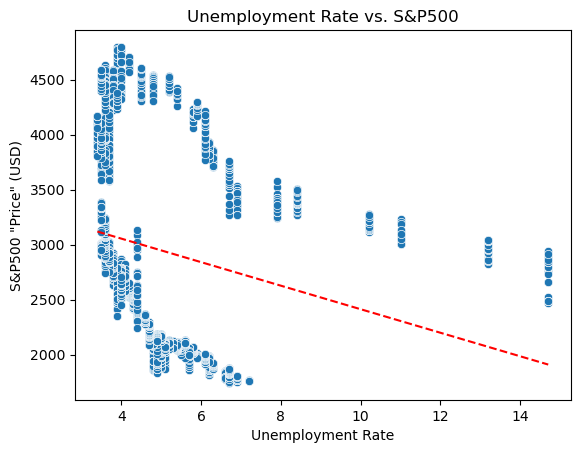

In [31]:
for col in numerical_columns:
    sns.scatterplot(data=merged_data, x=col, y='S&P500')
    plt.title(f'{col} vs. S&P500')
    plt.xlabel(col)
    plt.ylabel('S&P500 "Price" (USD)')
    slope, intercept = np.polyfit(merged_data[col], merged_data['S&P500'], 1)
    x_range = np.array([merged_data[col].min(), merged_data[col].max()])
    y_range = slope * x_range + intercept
    plt.plot(x_range, y_range, 'r--', label="Trend Line")
    plt.show()

In this cells below, we are calculating the Pearson correlation coefficient and p-value for each column in the merged_data DataFrame against the 'S&P500' column.

# Correlation Analysis

C:\Users\arneyh\AppData\Local\Temp\ipykernel_27008\4124801310.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


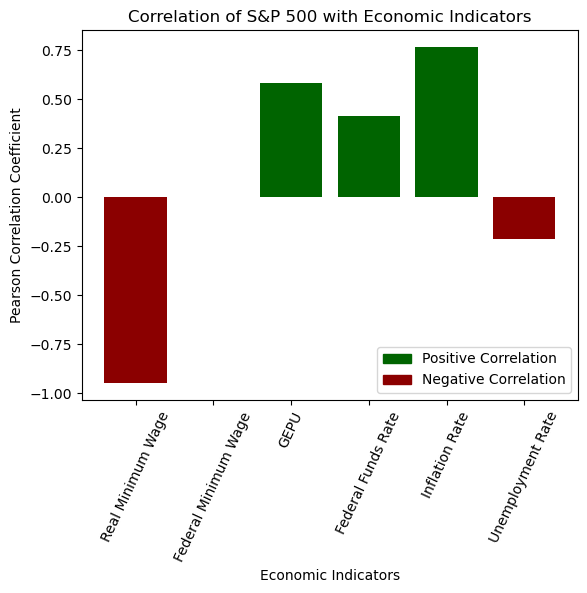

In [32]:
correlation_matrix = merged_data.corr()

sp500_correlations = correlation_matrix['S&P500'].drop('S&P500')

colors = np.where(sp500_correlations >= 0, 'darkgreen', 'darkred')
bars = plt.bar(sp500_correlations.index, sp500_correlations, color=colors)
plt.title('Correlation of S&P 500 with Economic Indicators')
plt.xlabel('Economic Indicators')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=65)
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='darkgreen', ec='darkgreen'),
                    plt.Rectangle((0, 0), 1, 1, color='darkred', ec='darkred')],
           labels=['Positive Correlation', 'Negative Correlation'])

plt.show()

In [33]:
significant_variables = []
non_significant_variables = []
 
for col in numerical_columns:
    corr, p_value = pearsonr(merged_data['S&P500'], merged_data[col])
    alpha = 0.001
    if p_value < alpha:
        significant_variables.append((col, corr, p_value))
    else:
        non_significant_variables.append((col, corr, p_value))

C:\Users\arneyh\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [34]:
print("Significant numerical variable p-values:")
for variable, corr, p_value in significant_variables:
    print(f"  {variable}:\n\tcorrelation: {corr:} \n\tp-value = {p_value:}")
print("\nNon-Significant numerical variable p-values:")
for variable, corr, p_value in non_significant_variables:
    print(f"  {variable}:\n\tcorrelation: {corr:} \n\tp-value = {p_value:}")

Significant numerical variable p-values:
  Real Minimum Wage:
	correlation: -0.9471436340371983 
	p-value = 0.0
  GEPU:
	correlation: 0.5835556406365539 
	p-value = 0.0
  Federal Funds Rate:
	correlation: 0.41476977672526943 
	p-value = 3.404760210432581e-151
  Inflation Rate:
	correlation: 0.7669347346711716 
	p-value = 0.0
  Unemployment Rate:
	correlation: -0.21373856130335928 
	p-value = 7.761913499779803e-39

Non-Significant numerical variable p-values:
  Federal Minimum Wage:
	correlation: nan 
	p-value = nan


# Variable Tests
**Real Minimum Wage:**
- Strong negative linear relationship with the target variable.
- Statistically significant correlation.

**GEPU:**
- Moderate positive linear relationship with the target variable.
- Statistically significant correlation.

**Federal Funds Rate:**
- Moderate positive linear relationship with the target variable.
- Highly statistically significant correlation.

**Inflation Rate:**
- Strong positive linear relationship with the target variable.
- Statistically significant correlation.

**Unemployment Rate:**
- Weak negative linear relationship with the target variable.
- Highly statistically significant correlation.

**Federal Minimum Wage:**
- No linear relationship with the target variable.
- No statistically significant correlation.

# Time Based Linear Regression Model using a Pipeline

In [35]:
X = merged_data[["Real Minimum Wage", "GEPU", "Federal Funds Rate", "Inflation Rate", "Unemployment Rate"]]
y = merged_data["S&P500"]

In [36]:
np.random.seed(42)

train_start_date = '2013-10-28'
train_end_date = '2020-12-1'
test_start_date = '2020-12-2'
test_end_date = '2023-10-01'

train_mask = (merged_data['Date'] >= train_start_date) & (merged_data['Date'] <= train_end_date)
test_mask = (merged_data['Date'] >= test_start_date) & (merged_data['Date'] <= test_end_date)

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
pipe = Pipeline([('imputer', SimpleImputer()),
                ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [38]:
params = {'imputer__strategy':['mean', 'median', 'most_frequent']}

In [39]:
np.random.seed(42)
grid = GridSearchCV(pipe, params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent']})

In [40]:
print("Best Hyper Parameter: ", grid.best_params_)

Best Hyper Parameter:  {'imputer__strategy': 'mean'}


In [41]:
print("Best Hyper Parameter Accuracy: ", grid.best_score_)

Best Hyper Parameter Accuracy:  0.9530276145521421


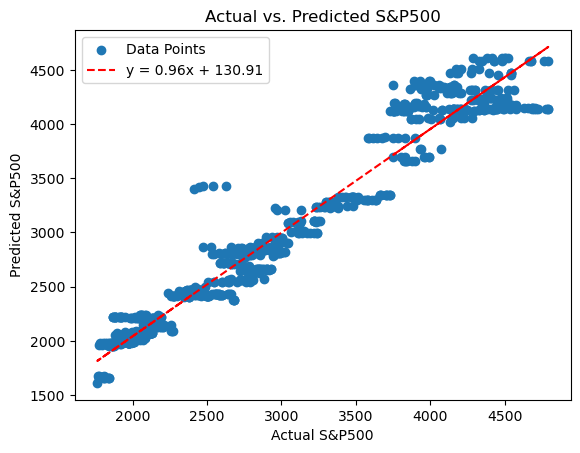

In [42]:
y_pred = grid.predict(X_test)
# Model Data Points
plt.scatter(y_test, y_pred)
plt.xlabel("Actual S&P500")
plt.ylabel("Predicted S&P500")
plt.title("Actual vs. Predicted S&P500")
# Trend Line
trend_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(trend_line, y_test), color='red', linestyle='--', label='Trend Line')
slope, intercept = trend_line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.legend(['Data Points', equation])
plt.show()

# Creating a baseline and linear regression models:

### a. A baseline or null model using only the intercept

In [43]:
intercept_X = np.ones((len(merged_data), 1))
y = merged_data['S&P500']
baseline_model = sm.OLS(y, intercept_X)
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 S&P500   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 06 Dec 2023   Prob (F-statistic):                nan
Time:                        22:15:30   Log-Likelihood:                -29847.
No. Observations:                3636   AIC:                         5.970e+04
Df Residuals:                    3635   BIC:                         5.970e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2951.4816     14.739    200.248      0.000    2922.584    2980.379
==============================================================================
Omnibus:                     2043.239   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              336.414
Skew:                           0.479   Prob(JB):                     8.88e-74
Kurtosis:                       1.859   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
baseline_predictions = baseline_results.predict(intercept_X)
baseline_rmse = np.sqrt(mean_squared_error(y, baseline_predictions))

### "Greedy" Approach Model. 

In [45]:
selected_variables = []
statistically_significant_variables = ["Unemployment Rate", "GEPU", "Federal Funds Rate", "Inflation Rate", "Real Minimum Wage"]
greedy_best_rmse = baseline_rmse
best_adj_r_squared = 0
original_model = baseline_model
candidate_X = 0

adj_r_squared_list = []
rmse_list = []
variable_names = []

for variable in statistically_significant_variables:
    candidate_variables = selected_variables + [variable]
    candidate_X = sm.add_constant(merged_data[candidate_variables])
    original_model = sm.OLS(y, candidate_X)
    original_results = original_model.fit()
    
    y_pred = original_results.predict(candidate_X)
    adj_r_squared = original_results.rsquared_adj
    
    adj_r_squared_list.append(adj_r_squared)
    rmse_list.append(np.sqrt(mean_squared_error(y, y_pred)))
    variable_names.append(variable)
    
    if adj_r_squared > best_adj_r_squared:
        print("ADJ R = ", adj_r_squared)
        best_adj_r_squared = adj_r_squared
        greedy_best_rmse = np.sqrt(mean_squared_error(y, y_pred))
        selected_variables = candidate_variables
        best_model = original_model

print("Selected variables:", selected_variables)

greedy_model = best_model
greedy_results = greedy_model.fit()
greedy_rmse = greedy_best_rmse

ADJ R =  0.045421565040585477
ADJ R =  0.41667045285080384
ADJ R =  0.42919319231964637
ADJ R =  0.7155245750676242
ADJ R =  0.9531769442325383
Selected variables: ['Unemployment Rate', 'GEPU', 'Federal Funds Rate', 'Inflation Rate', 'Real Minimum Wage']


In [46]:
summary_table = pd.DataFrame({
    'Variable': variable_names,
    'Adjusted R-squared': adj_r_squared_list,
    'RMSE': rmse_list
})
summary_table.head(6)

,Variable,Adjusted R-squared,RMSE
0,Unemployment Rate,0.045422,868.099647
1,GEPU,0.416670,678.517409
2,Federal Funds Rate,0.429193,671.102413
3,Inflation Rate,0.715525,473.703737
4,Real Minimum Wage,0.953177,192.156243


In [47]:
greedy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 S&P500   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.480e+04
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:15:30   Log-Likelihood:                -24278.
No. Observations:                3636   AIC:                         4.857e+04
Df Residuals:                    3630   BIC:                         4.861e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.035e+04    142.114    143.199      0.000    2.01e+04    2.06e+04
Unemployment Rate    -57.7631      2.603    -22.188      0.000     -62.867     -52.659
GEPU                  -0.7408      0.060    -12.279      0.000      -0.859      -0.623
Federal Funds Rate  -223.3346      3.805    -58.699      0.000    -230.794    -215.875
Inflation Rate       -22.9310      2.637     -8.697      0.000     -28.100     -17.762
Real Minimum Wage  -1994.2435     14.690   -135.758      0.000   -2023.044   -1965.443
==============================================================================
Omnibus:                      396.165   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.153
Skew:                          -0.492   Prob(JB):                         0.00
Kurtosis:                       6.035   Cond. No.                     9.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

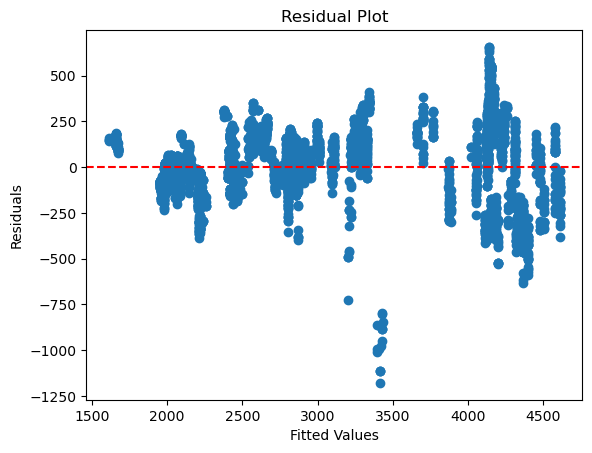

In [48]:
residuals = greedy_results.resid

plt.scatter(greedy_results.fittedvalues, residuals)
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Results from Regression
The Greedy and Pipeline approach both produced similar high accuracies. They both used all but one of the predictor variables we tested, using only the statistically significant variables. We were able to prove our hypothesis in both a general and specific sense. Each economic factor played a factor in the model, even if certain features were better than others. We were able to prove that these major economic factors do have correlation with the S&P 500. Both are highly accurate models and logically it makes sense many of these options would correlate with the S&P 500. That's mostly why we selected them in the first place. The analysis could be improved by adding more data, and it would be cool for it to be something other than just numerical. Some categorical types would be interesting to bring a little more diversity to the data.

The Residual plot shows that most of the points are near 0, but quite a few come over a 1000 off the predicted value. We would hypothesize this has something to do with COVID.

# Conclusion
We were able to build a pretty successful model, however this truly doesn't mean much. The variables we were testing are just as unpredictable as the stock market itself, for example, we can't know exactly what the unemployment rate is going to look like in a year because there are so many factors that could happen within that time. COVID is a prime example of an outlier within this data where almost all of the points were affected by it. People having to stay inside for an extended period of time greatly affected the economy as a whole. A world wide outbreak like this is truly unpredictable, even if it is eventually inevitable. The same can be said for large increase during a short amount of time from an event that triggers massive buying such as Nvidia stock this year. In order to find a true predictor of the stock market that itself is somewhat predictable, we'd have to dig deeper into research and testing.